# Loading the dataset

In [ ]:
import pandas as pd

# Used the MovieLens 20M Dataset
# https://grouplens.org/datasets/movielens/20m/
path = ''
ratings = pd.read_csv(path + 'ratings.csv')
movies = pd.read_csv(path + 'movies.csv')

In [2]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


# Data Preprocessing

In [8]:
# Handle Missing Values
# Check for missing values in the ratings dataset
print("ratings.csv")
print(ratings.isnull().sum())

print("\nmovies.csv")
print(movies.isnull().sum())

ratings.csv
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

movies.csv
movieId    0
title      0
genres     0
dtype: int64


In [9]:
# Remove Duplicates
# Check for duplicates in the ratings dataset
print("Before removing duplicates:", ratings.shape)
ratings.drop_duplicates(inplace=True)
print("After removing duplicates:", ratings.shape)

Before removing duplicates: (20000263, 4)
After removing duplicates: (20000263, 4)


In [10]:
# Check for duplicates in the movies dataset
print("Before removing duplicates:", movies.shape)
movies.drop_duplicates(inplace=True)
print("After removing duplicates:", movies.shape)

Before removing duplicates: (27278, 3)
After removing duplicates: (27278, 3)


In [11]:
# Handle Outliers in Ratings
# Ratings are between 0 and 5, so check for values outside this range
outliers = ratings[(ratings['rating'] < 0) | (ratings['rating'] > 5)]
print("Outliers in ratings:\n", outliers)

Outliers in ratings:
 Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []


In [12]:
# Correcting Errors (Check if user or movie IDs are invalid)
# If there are invalid user IDs or movie IDs, they would not exist in the ratings and movies datasets respectively
valid_user_ids = ratings['userId'].isin(ratings['userId'].unique())
valid_movie_ids = ratings['movieId'].isin(movies['movieId'].unique())

# Filter out invalid user IDs and movie IDs
ratings = ratings[valid_user_ids & valid_movie_ids]

# Verify the data cleaning
print(f"After cleaning, ratings dataset size: {ratings.shape}")
print(f"After cleaning, movies dataset size: {movies.shape}")

After cleaning, ratings dataset size: (20000263, 4)
After cleaning, movies dataset size: (27278, 3)


# Exploratary Data Anaysis(EDA)

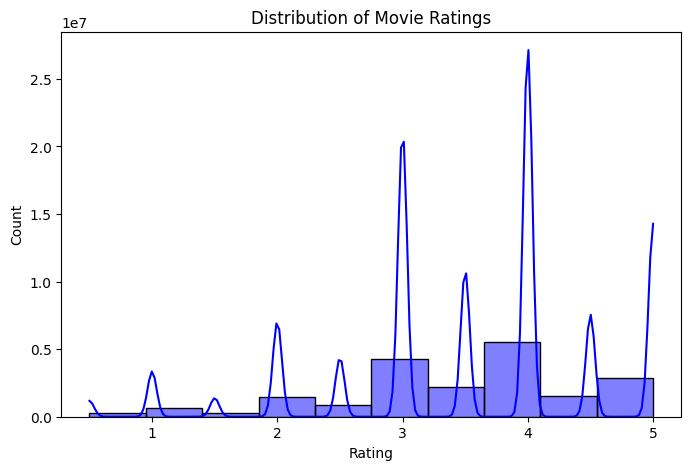

In [36]:
# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(ratings["rating"], bins=10, kde=True, color="blue")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()

In [37]:
# Top 10 most rated movies
top_movies = ratings["movieId"].value_counts().head(10).index
most_rated_movies = movies[movies["movieId"].isin(top_movies)]
print("\nTop 10 Most Rated Movies:")
print(most_rated_movies)



Top 10 Most Rated Movies:
      movieId                                      title  \
108       110                          Braveheart (1995)   
257       260  Star Wars: Episode IV - A New Hope (1977)   
293       296                        Pulp Fiction (1994)   
315       318           Shawshank Redemption, The (1994)   
352       356                        Forrest Gump (1994)   
476       480                       Jurassic Park (1993)   
523       527                    Schindler's List (1993)   
583       589          Terminator 2: Judgment Day (1991)   
587       593           Silence of the Lambs, The (1991)   
2486     2571                         Matrix, The (1999)   

                                genres  
108                   Action|Drama|War  
257            Action|Adventure|Sci-Fi  
293        Comedy|Crime|Drama|Thriller  
315                        Crime|Drama  
352           Comedy|Drama|Romance|War  
476   Action|Adventure|Sci-Fi|Thriller  
523                      

In [38]:
# Average rating per movie
avg_ratings = ratings.groupby("movieId")["rating"].mean().reset_index()
avg_ratings = avg_ratings.merge(movies, on="movieId").sort_values(by="rating", ascending=False)
print("\nTop 10 Highest Rated Movies:")
print(avg_ratings.head(10))


Top 10 Highest Rated Movies:
       movieId  rating                                              title  \
12005    54326     5.0                                  Sierra, La (2005)   
9005     26718     5.0      Life On A String (Bian chang Bian Zou) (1991)   
21842   105846     5.0                               Only Daughter (2013)   
15994    81117     5.0                             Moth, The (Cma) (1980)   
26655   130996     5.0                         The Beautiful Story (1992)   
21840   105841     5.0                                      B-Side (2013)   
26411   129478     5.0                          A Blank on the Map (1971)   
26423   129530     5.0                           Slingshot Hip Hop (2008)   
26421   129526     5.0                           The Color of Milk (2004)   
21310   103871     5.0  Consuming Kids: The Commercialization of Child...   

                                genres  
12005                      Documentary  
9005   Adventure|Drama|Fantasy|Musical  

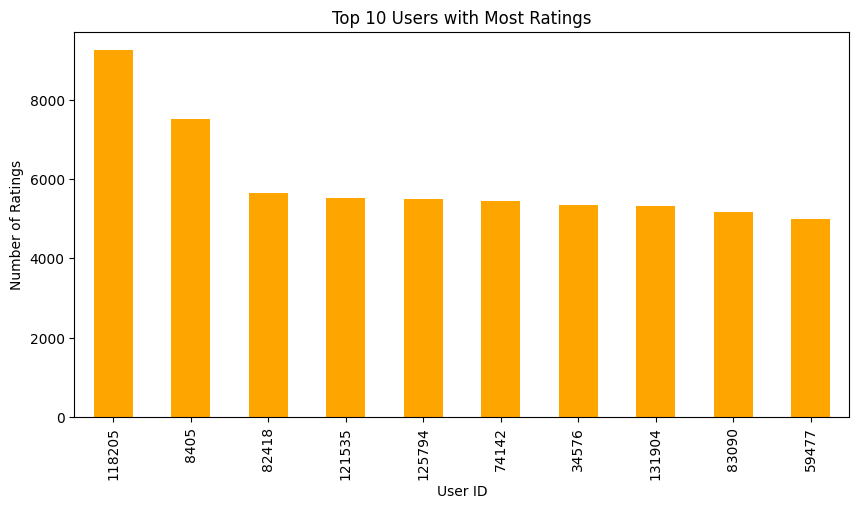

In [39]:
# Users with the most ratings
top_users = ratings["userId"].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_users.plot(kind='bar', color='orange')
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Users with Most Ratings")
plt.show()

C:\Users\Madhusmita Panda\AppData\Local\Temp\ipykernel_12976\3365732843.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")


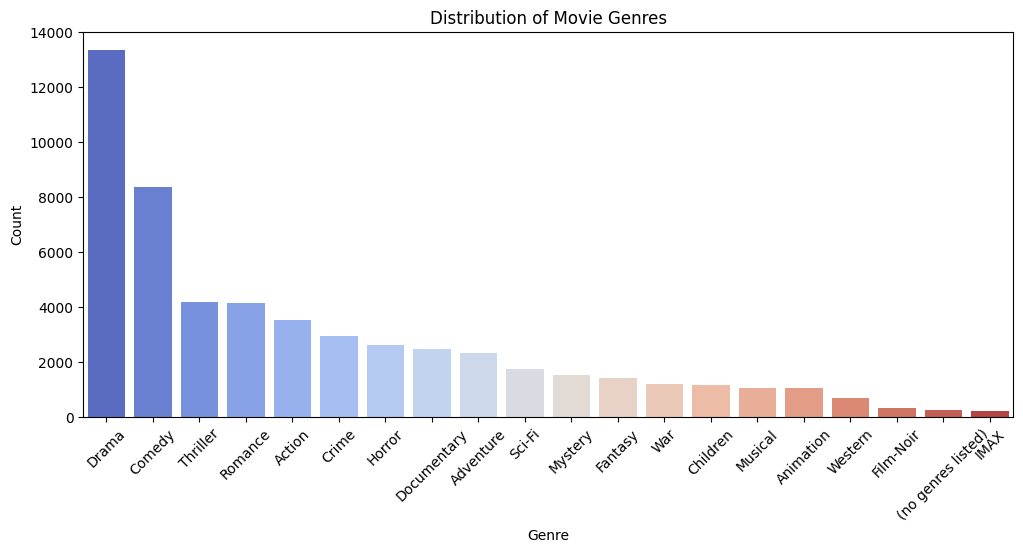

In [40]:
# Movie genres analysis
movies["genres"] = movies["genres"].apply(lambda x: x.split("|") if isinstance(x, str) else [])
all_genres = [genre for sublist in movies["genres"] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Movie Genres")
plt.show()


# Content Based Filtering

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a 'genres' matrix where each movie is represented by its genres
def create_genre_matrix(movies):
    genre_matrix = movies['genres'].str.get_dummies(sep='|')
    return genre_matrix

genre_matrix = create_genre_matrix(movies)

genre_matrix.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Compute cosine similarity between all movies based on genres
content_similarity = cosine_similarity(genre_matrix)

content_similarity.shape

(27278, 27278)

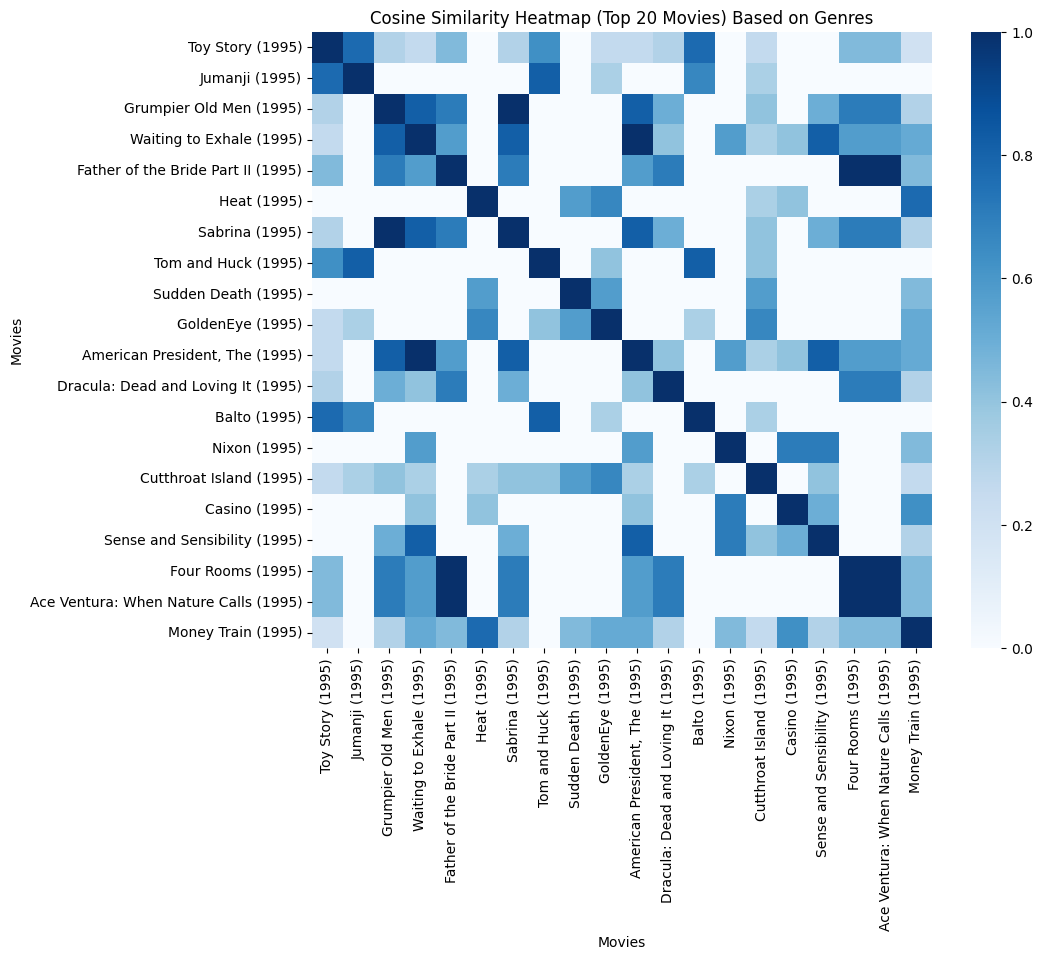

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of the top 20 movies (for example, the first 20 movies)
subset_size = 20
subset_similarity = content_similarity[:subset_size, :subset_size]
subset_titles = movies['title'][:subset_size]

# Create a heatmap for the smaller cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(subset_similarity, cmap='Blues', annot=False, fmt='.2f',
            xticklabels=subset_titles, yticklabels=subset_titles)

# Adding labels and title
plt.title(f"Cosine Similarity Heatmap (Top {subset_size} Movies) Based on Genres")
plt.xlabel("Movies")
plt.ylabel("Movies")
plt.show()


In [18]:
def content_based_recommendations(movie_name, top_n=10):
  # Find the index of the given movie by its name
  movie_idx = movies[movies['title'] == movie_name].index[0]

  # Get similarity scores for the given movie
  similar_scores = list(enumerate(content_similarity[movie_idx]))

  # Sort the movies by similarity score in descending order
  similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)

  # Get top N similar movies (excluding the movie itself)
  top_similar_movies = [movies.iloc[i[0]] for i in similar_scores[1:top_n+1]]

  return top_similar_movies

In [19]:
# Example usage: Get top 5 movies similar to 'Toy Story (1995)'
movie_title = "Toy Story (1995)"
recommended_movies = content_based_recommendations(movie_title, top_n=10)

# Display the recommended movies
for i in recommended_movies:
  x = i.tolist()
  print(f"{x[1]}")

Antz (1998)
Toy Story 2 (1999)
Adventures of Rocky and Bullwinkle, The (2000)
Emperor's New Groove, The (2000)
Monsters, Inc. (2001)
DuckTales: The Movie - Treasure of the Lost Lamp (1990)
Wild, The (2006)
Shrek the Third (2007)
Tale of Despereaux, The (2008)
Asterix and the Vikings (Astérix et les Vikings) (2006)


# Collaborative filtering - User based

In [20]:
from scipy.sparse import coo_matrix

sparse_matrix = coo_matrix((ratings['rating'], (ratings['userId'], ratings['movieId'])))

In [21]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
model.fit(sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [22]:
# Define recommendation function
def recommend_user_based(user_id, model=model):
    user_row = sparse_matrix.getrow(user_id - 1)
    distances, indices = model.kneighbors(user_row)

    similar_users = indices.flatten()

    recommendations = []
    for user in similar_users[1:]:  # Skip the first user (the same user)
        similar_user_ratings = sparse_matrix.getrow(user).toarray().flatten()
        recommendations.extend([i for i, rating in enumerate(similar_user_ratings) if rating > 0])

    # Remove duplicates
    recommendations = list(set(recommendations))

    return recommendations

In [23]:
# Convert movie IDs to movie titles
def get_movie_titles(movie_ids):
    # Get movie titles for the movieIds, limit to the first 10 movieIds
    movie_titles = movies[movies['movieId'].isin(movie_ids)]['title'].tolist()
    return movie_titles[:10]  # Limit the result to the top 10

# List the movies the user has already seen
def get_user_movies(user_id):
    user_ratings = ratings[ratings['userId'] == user_id]
    user_movies = user_ratings.merge(movies, on='movieId')[['title', 'rating']]
    return user_movies.head(10)  # Limit to top 10 movies already seen

# Test the function with a specific user (e.g., user 1)
user_id = 8
recommended_movie_ids = recommend_user_based(user_id)

# Get movie titles for the recommendations
recommended_movie_titles = get_movie_titles(recommended_movie_ids)

# Get the movies the user has already seen (limit to top 10)
user_movies = get_user_movies(user_id)

# Print the results
print(f"Top 10 Movies recommended for User {user_id}:")
for title in recommended_movie_titles:
    print(f"- {title}")

print(f"\nTop 10 Movies already seen by User {user_id}:")
for _, row in user_movies.iterrows():
    print(f"- {row['title']} (Rating: {row['rating']})")

Top 10 Movies recommended for User 8:
- Toy Story (1995)
- Jumanji (1995)
- Grumpier Old Men (1995)
- Heat (1995)
- Sabrina (1995)
- Sudden Death (1995)
- GoldenEye (1995)
- American President, The (1995)
- Dracula: Dead and Loving It (1995)
- Balto (1995)

Top 10 Movies already seen by User 8:
- Toy Story (1995) (Rating: 4.0)
- Grumpier Old Men (1995) (Rating: 5.0)
- Heat (1995) (Rating: 3.0)
- GoldenEye (1995) (Rating: 4.0)
- Ace Ventura: When Nature Calls (1995) (Rating: 1.0)
- Get Shorty (1995) (Rating: 4.0)
- Clueless (1995) (Rating: 3.0)
- Seven (a.k.a. Se7en) (1995) (Rating: 5.0)
- Pocahontas (1995) (Rating: 4.0)
- Braveheart (1995) (Rating: 5.0)


# Collaborative filtering - User based performance

In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score


In [25]:
#Define Evaluation Metrics
#Modify your recommend_user_based function to return predicted ratings.
def recommend_user_based_ratings(user_id, model=model):
    user_row = sparse_matrix.getrow(user_id - 1)
    distances, indices = model.kneighbors(user_row)

    similar_users = indices.flatten()

    recommendations = {}
    for user in similar_users[1:]:  # Skip the first user (the same user)
        similar_user_ratings = sparse_matrix.getrow(user).toarray().flatten()
        for i, rating in enumerate(similar_user_ratings):
            if rating > 0:
                recommendations[i] = rating  # Store predicted rating

    return recommendations


In [26]:
#Get Ground Truth Ratings
#Extract actual ratings from dataset.
def get_actual_ratings(user_id):
    return ratings[ratings['userId'] == user_id].set_index('movieId')['rating'].to_dict()


#calculate RMSE, MAE, Precision, Recall, F1-score, and Accuracy.
# Get actual and predicted ratings
actual_ratings = get_actual_ratings(user_id)
predicted_ratings = recommend_user_based_ratings(user_id)

# Convert dictionaries to lists (align actual and predicted ratings)
common_movies = set(actual_ratings.keys()) & set(predicted_ratings.keys())
y_true = [actual_ratings[movie] for movie in common_movies]
y_pred = [predicted_ratings[movie] for movie in common_movies]

# Compute RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

# Convert ratings to binary for classification metrics
threshold = 3.5  # Consider ratings ≥3.5 as positive (liked)
y_true_binary = [1 if rating >= threshold else 0 for rating in y_true]
y_pred_binary = [1 if rating >= threshold else 0 for rating in y_pred]

# Compute Precision, Recall, F1-Score, and Accuracy
precision = precision_score(y_true_binary, y_pred_binary, zero_division=1)
recall = recall_score(y_true_binary, y_pred_binary, zero_division=1)
f1 = f1_score(y_true_binary, y_pred_binary, zero_division=1)
accuracy = accuracy_score(y_true_binary, y_pred_binary)

# Print Results
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


RMSE: 1.1263
MAE: 0.8209
Precision: 0.7812
Recall: 0.5682
F1 Score: 0.6579
Accuracy: 0.6119


# Collaborative Filtering using ALS

In [27]:
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix

In [28]:

# Create a sparse user-item matrix directly from the ratings DataFrame
# We need to convert the userId and movieId to a format suitable for the sparse matrix
user_ids = ratings['userId'].astype('category').cat.codes
movie_ids = ratings['movieId'].astype('category').cat.codes

In [29]:
# Create a sparse matrix
sparse_user_item = csr_matrix((ratings['rating'], (user_ids, movie_ids)))

# Initialize the ALS model
model = AlternatingLeastSquares(factors=50, regularization=0.1, iterations=20)

# Fit the model
model.fit(sparse_user_item)

C:\Users\Madhusmita Panda\AppData\Local\Programs\Python\Python312\Lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: OpenBLAS is configured to use 8 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/20 [00:00<?, ?it/s]

In [30]:
# Function to get movie recommendations for a specific user
def get_als_recommendations(user_id, num_recommendations=5):
    # Convert user_id to the corresponding index in the sparse matrix
    user_index = ratings['userId'].astype('category').cat.codes[ratings['userId'] == user_id].values[0]

    # Get the user's ratings
    user_ratings = sparse_user_item[user_index]

    # Get recommendations
    recommended = model.recommend(user_index, user_ratings, N=num_recommendations)

    # Extract movie indices and scores correctly
    recommended_movie_indices = [rec[0] for rec in recommended]  # Movie indices from the tuples
    recommended_scores = [rec[1] for rec in recommended]        # Scores from the tuples

    # Map from internal movie index to the original movieId
    movie_ids_from_model = movies['movieId'].values  # The original movie IDs
    category_codes_to_movie_id = dict(zip(movies['movieId'].astype('category').cat.codes, movie_ids_from_model))

    # Now use the correct mapping from internal indices to movie IDs
    recommendations_df = pd.DataFrame({
        'movieId': [category_codes_to_movie_id[int(movie_id)] for movie_id in recommended_movie_indices],  # Make sure to cast to int
        'score': recommended_scores
    })

    # Merge with the movies DataFrame to get titles
    recommendations = pd.merge(recommendations_df, movies, on='movieId')
    return recommendations[['movieId', 'title', 'score']]


In [31]:
# Example usage
if __name__ == "__main__":
    user_id = 23
    recommendations = get_als_recommendations(user_id)
    print("Recommendations for user ID {}: \n{}".format(user_id, recommendations))

Recommendations for user ID 23: 
   movieId                    title        score
0     1682  Truman Show, The (1998)  1713.000000
1        1         Toy Story (1995)     0.955707


# Collaborative Filtering using ALS performance

In [32]:
#Modify the get_als_recommendations function to return predicted ratings.
def get_als_predicted_ratings(user_id):
    user_index = ratings['userId'].astype('category').cat.codes[ratings['userId'] == user_id].values[0]
    
    # Predict scores for all movies
    recommended = model.recommend(user_index, sparse_user_item[user_index], N=len(movies))

    # Extract movie indices and predicted ratings
    recommended_ratings = {rec[0]: rec[1] for rec in recommended}

    # Map internal movie index to original movieId
    movie_ids_from_model = movies['movieId'].values  
    category_codes_to_movie_id = dict(zip(movies['movieId'].astype('category').cat.codes, movie_ids_from_model))

    # Convert to a dictionary with movieId as key
    predicted_ratings = {category_codes_to_movie_id[int(movie_id)]: rating for movie_id, rating in recommended_ratings.items()}
    
    return predicted_ratings


In [33]:
#Get Ground Truth Ratings
#Extract actual ratings from the dataset.
def get_actual_ratings(user_id):
    return ratings[ratings['userId'] == user_id].set_index('movieId')['rating'].to_dict()


In [34]:
#Compute Evaluation Metrics
#calculate RMSE, MAE, Precision, Recall, F1-score, and Accuracy.
# Get actual and predicted ratings
actual_ratings = get_actual_ratings(user_id)
predicted_ratings = get_als_predicted_ratings(user_id)

# Convert dictionaries to lists (align actual and predicted ratings)
common_movies = set(actual_ratings.keys()) & set(predicted_ratings.keys())
y_true = [actual_ratings[movie] for movie in common_movies]
y_pred = [predicted_ratings[movie] for movie in common_movies]

# Compute RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

# Convert ratings to binary for classification metrics
threshold = 3.5  # Consider ratings ≥3.5 as positive (liked)
y_true_binary = [1 if rating >= threshold else 0 for rating in y_true]
y_pred_binary = [1 if rating >= threshold else 0 for rating in y_pred]

# Compute Precision, Recall, F1-Score, and Accuracy
precision = precision_score(y_true_binary, y_pred_binary, zero_division=1)
recall = recall_score(y_true_binary, y_pred_binary, zero_division=1)
f1 = f1_score(y_true_binary, y_pred_binary, zero_division=1)
accuracy = accuracy_score(y_true_binary, y_pred_binary)

# Print Results
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


RMSE: 3.0443
MAE: 3.0443
Precision: 1.0000
Recall: 0.0000
F1 Score: 0.0000
Accuracy: 0.0000


# Hybrid Recommendation 

In [35]:
def hybrid_recommendations(user_id, movie_name, top_n=10):
    # Get content-based recommendations
    try:
        content_recs = content_based_recommendations(movie_name, top_n)
        if not content_recs:
            print(f"No content-based recommendations found for the movie '{movie_name}'.")
        else:
            # Format the content-based recommendations as per the new example code
            content_recs_titles = [rec.tolist()[1] for rec in content_recs]  # Get the movie title
            print(f"Content-Based Recommendations: {content_recs_titles}")
    except Exception as e:
        #print(f"Error in content-based recommendations: {e}")
        content_recs_titles = []

    # Get user-based recommendations
    try:
        user_based_recs = recommend_user_based(user_id)
        if not user_based_recs:
            print(f"No user-based recommendations found for user {user_id}.")
    except Exception as e:
        print(f"Error in user-based recommendations: {e}")
        user_based_recs = []

    # Get ALS-based recommendations
    try:
        als_recs = get_als_recommendations(user_id, num_recommendations=top_n)
        if als_recs.empty:
            print(f"No ALS-based recommendations found for user {user_id}.")
    except Exception as e:
        print(f"Error in ALS-based recommendations: {e}")
        als_recs = pd.DataFrame()

    # Extract titles from the user-based recommendations if available
    user_based_recs_titles = get_movie_titles(user_based_recs) if user_based_recs else []

    # Extract titles from ALS-based recommendations if available
    als_recs_titles = als_recs['title'].tolist() if not als_recs.empty else []

    # Combine all recommendations
    all_recommendations = content_recs_titles + user_based_recs_titles + als_recs_titles

    # Remove duplicates by converting to a set and back to a list
    unique_recommendations = list(set(all_recommendations))

    # Limit the recommendations to top_n
    return unique_recommendations[:top_n]

# Test the hybrid recommendation function
user_id = 8
movie_name = "Home Alone"
top_n = 10
hybrid_recs = hybrid_recommendations(user_id, movie_name, top_n)

print(f"\nTop {top_n} Hybrid Recommendations for User {user_id} based on the movie '{movie_name}':")
for rec in hybrid_recs:
    print(f"- {rec}")



Top 10 Hybrid Recommendations for User 8 based on the movie 'Home Alone':
- Home Alone (1990)
- Dracula: Dead and Loving It (1995)
- Sabrina (1995)
- Jumanji (1995)
- Balto (1995)
- Sudden Death (1995)
- American President, The (1995)
- Grumpier Old Men (1995)
- GoldenEye (1995)
- Toy Story (1995)
